In [1]:
#import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#create a set of random latitdue and longitude comninations 
lats = np.random.uniform(low = -90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low = 180.000, high = 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
import requests 
from config import weather_api_key
from citipy import citipy 

In [4]:
#starting URL for weather Map API Call.
url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0a76512f1b7f80ce6ab8b33895d66a0f


In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

595

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bafq
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | karratha
Processing Record 6 of Set 1 | sosua
Processing Record 7 of Set 1 | sobolevo
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | popondetta
Processing Record 14 of Set 1 | buala
Processing Record 15 of Set 1 | kloulklubed
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | meulaboh
Processing Record 21 of Set 1 | sao filipe
Processing Record 22 of Set 1 | saint-augustin
Processing Record 23 of Set 1 | cidreira
Processing Record 24 of Set 1 | mataura
Processing Rec

Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | batemans bay
Processing Record 39 of Set 4 | borogontsy
Processing Record 40 of Set 4 | calama
Processing Record 41 of Set 4 | maldonado
Processing Record 42 of Set 4 | baykit
Processing Record 43 of Set 4 | toungoo
City not found. Skipping...
Processing Record 44 of Set 4 | acapulco
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | biak
Processing Record 48 of Set 4 | sechura
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | lebanon
Processing Record 2 of Set 5 | hailey
Processing Record 3 of Set 5 | san angelo
Processing Record 4 of Set 5 | shizunai
Processing Record 5 of Set 5 | sicamous
Processing Record 6 of Set 5 | berlevag
Processing Record 7 of Set 5 | basoko
Processing Record 8 of Set 5 | prince rupert
Processing Record 9 of Set 5 | kungur
Proc

Processing Record 22 of Set 8 | severomuysk
Processing Record 23 of Set 8 | viedma
Processing Record 24 of Set 8 | larsnes
Processing Record 25 of Set 8 | killybegs
Processing Record 26 of Set 8 | gumrak
Processing Record 27 of Set 8 | nouadhibou
Processing Record 28 of Set 8 | state college
Processing Record 29 of Set 8 | gamba
Processing Record 30 of Set 8 | den helder
Processing Record 31 of Set 8 | xichang
Processing Record 32 of Set 8 | lodwar
Processing Record 33 of Set 8 | camocim
Processing Record 34 of Set 8 | sambava
Processing Record 35 of Set 8 | piacabucu
Processing Record 36 of Set 8 | maarianhamina
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | misratah
Processing Record 39 of Set 8 | los llanos de aridane
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | dongkan
Processing Record 45

Processing Record 8 of Set 12 | pointe-noire
Processing Record 9 of Set 12 | prainha
Processing Record 10 of Set 12 | prabumulih
Processing Record 11 of Set 12 | barra patuca
Processing Record 12 of Set 12 | guangyuan
Processing Record 13 of Set 12 | kidal
Processing Record 14 of Set 12 | blenheim
Processing Record 15 of Set 12 | bahia blanca
Processing Record 16 of Set 12 | seoul
Processing Record 17 of Set 12 | koboldo
City not found. Skipping...
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | bodden town
Processing Record 20 of Set 12 | mogadishu
Processing Record 21 of Set 12 | ranong
Processing Record 22 of Set 12 | caravelas
Processing Record 23 of Set 12 | severo-yeniseyskiy
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | cartagena
Processing Record 26 of Set 12 | dongsheng
Processing Record 27 of Set 12 | karamea
City not found. Skipping...
Processing Record 28 of Set 12 | tolaga bay
Processing Record 29 of Set 12 | rio brilhan

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bafq,31.6128,55.4107,46.47,46,0,1.72,IR,2021-01-16 02:04:17
1,Hilo,19.7297,-155.0900,82.40,57,20,13.80,US,2021-01-16 02:00:11
2,Punta Arenas,-53.1500,-70.9167,51.80,87,20,11.50,CL,2021-01-16 02:02:23
3,East London,-33.0153,27.9116,70.63,74,22,18.92,ZA,2021-01-16 01:59:41
4,Karratha,-20.7377,116.8463,94.91,49,40,13.15,AU,2021-01-16 02:04:17
5,Sosua,19.7667,-70.5167,71.60,94,40,5.82,DO,2021-01-16 02:04:17
6,Sobolevo,54.4299,31.8996,-9.44,90,63,5.59,RU,2021-01-16 02:04:18
7,Barrow,71.2906,-156.7887,-9.40,70,90,18.41,US,2021-01-16 01:59:40
8,Puerto Ayora,-0.7393,-90.3518,73.99,94,93,1.01,EC,2021-01-16 02:04:18
9,Atuona,-9.8000,-139.0333,77.74,75,5,11.74,PF,2021-01-16 01:59:31


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
#extract relevant fields from the DataFrame for plotting 
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
#import the time module 
import time
#get today"s date in seconds 
today = time.strftime("%x")
today

'01/15/21'

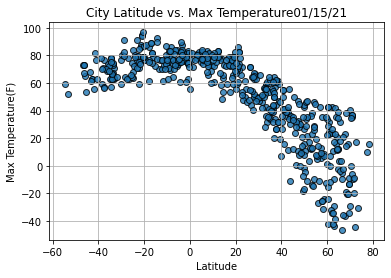

In [14]:
#import the moudle 
import time 

#building the scatter plot for latitiude vs max temperature 
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker ="o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properites 
plt.title(f"City Latitude vs. Max Temperature" + time. strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure 
plt.savefig("weather_data/Fig2.png")

#show plt 
plt.show()

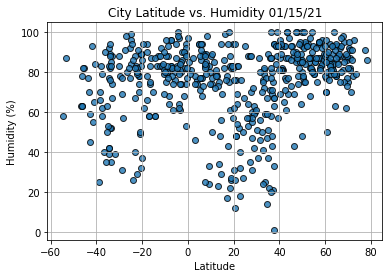

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

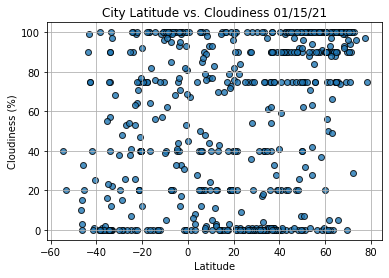

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

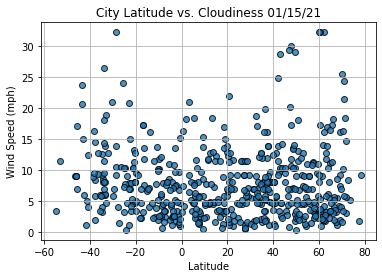

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()